In [6]:
#!/usr/bin/env python
# coding: utf-8

import astropy.units as u
import numpy as np
import pytest

from plasmapy import simulation
from plasmapy.formulary import magnetostatics
from plasmapy.classes.sources import Coils
import matplotlib.pyplot as plt
import pyvista

MINOR_RADIUS = 0.3 * u.m
RADIUS = 1 * u.m
MAIN_CURRENT = 0 * u.MA

COIL_CURRENTS = 1 * [10 * u.MA]


coils = Coils.toykamak(MINOR_RADIUS, RADIUS, MAIN_CURRENT, COIL_CURRENTS)


x = u.Quantity([[1 + MINOR_RADIUS.si.value / 2, 0, 0]], u.m)
v = u.Quantity([[0, 100, 0]], u.m / u.s, dtype=float)

sim_single = simulation.ParticleTracker(coils, x, v, "e-")

registration of accessor <class 'plasmapy.simulation.particletracker.ParticleTrackerAccessor'> under name 'particletracker' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.


In [7]:
sim_single.integrators

{'explicit_boris': CPUDispatcher(<function _boris_push at 0x7f42850d7820>),
 'implicit_boris': CPUDispatcher(<function _boris_push_implicit at 0x7f42850d79d0>),
 'implicit_boris2': CPUDispatcher(<function _boris_push_implicit2 at 0x7f42850d7b80>),
 'zenitani': CPUDispatcher(<function _zenitani at 0x7f42850e60d0>)}

explicit_boris


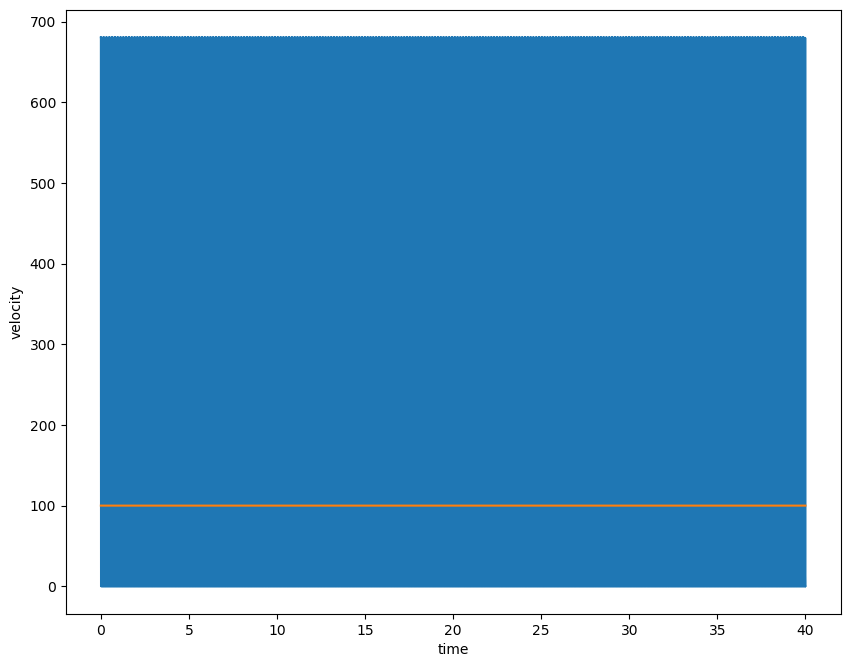

implicit_boris


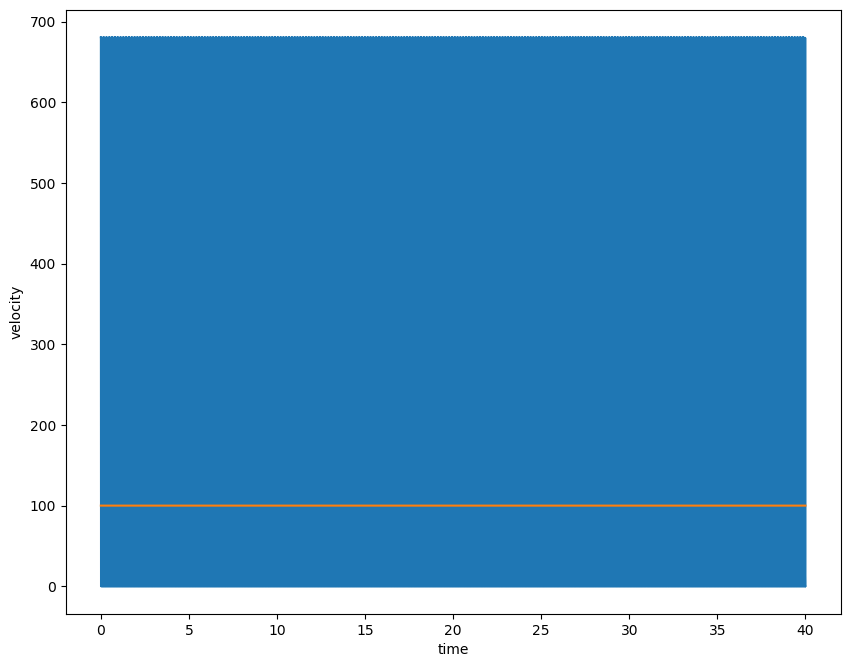

implicit_boris2


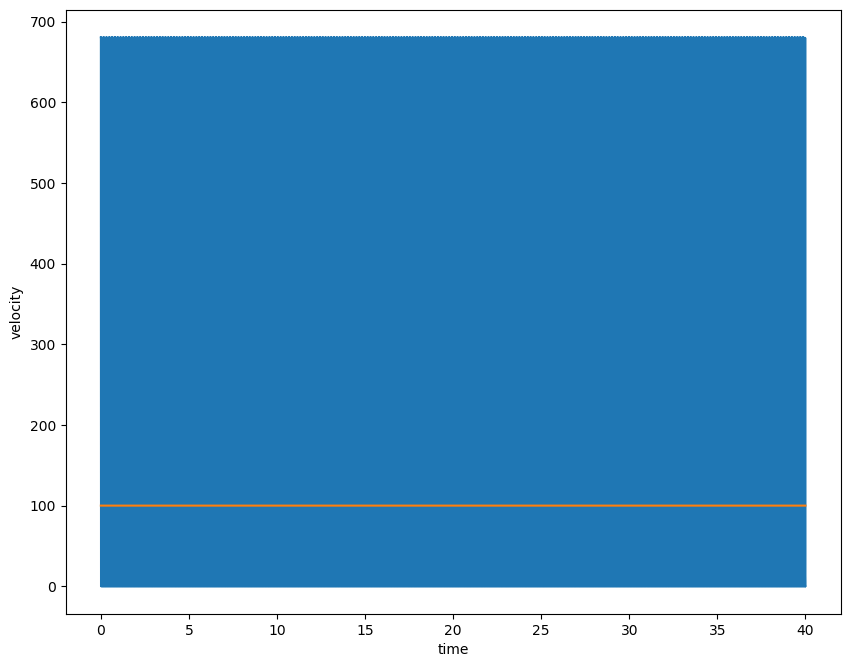

zenitani


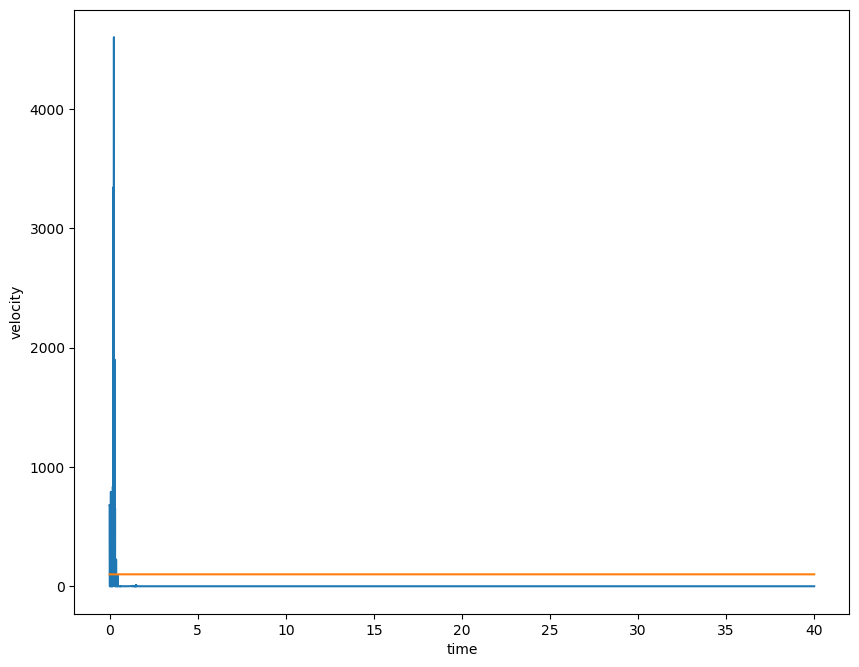

In [8]:
solutions = {}
for push in sim_single.integrators:
    print(push)
    solution = sim_single.run(40 * u.s, 1e-4 * u.s, pusher=push)
    solutions[push] = solution
#     fig = pyvista.Plotter()
#     solution.visualize(fig)
#     fig.show()
    (solution.B**2).sum(dim=['particle','dimension']).plot.line()
    np.sqrt((solution.velocity**2).sum(dim=['particle','dimension'])).plot.line()
    plt.show()

explicit_boris


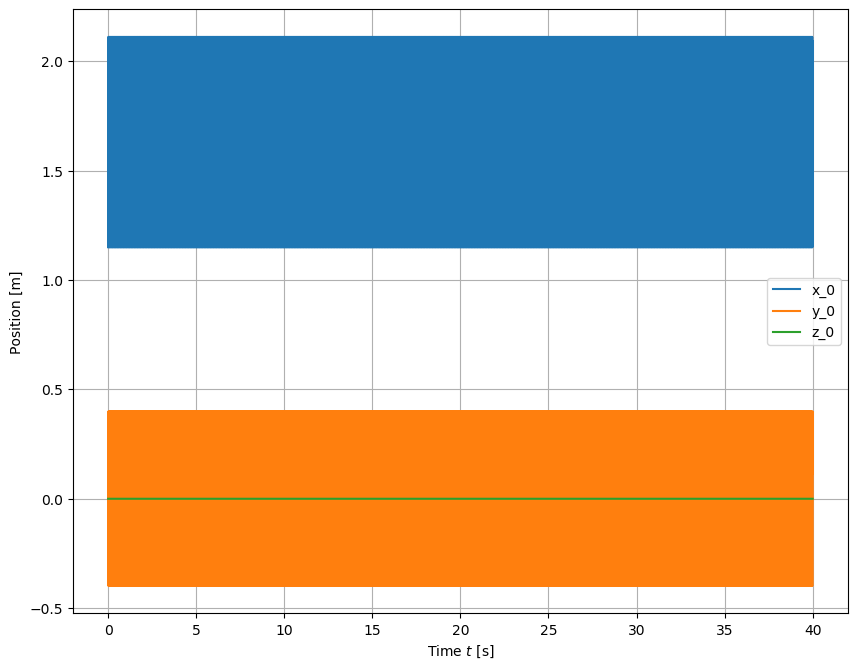

implicit_boris


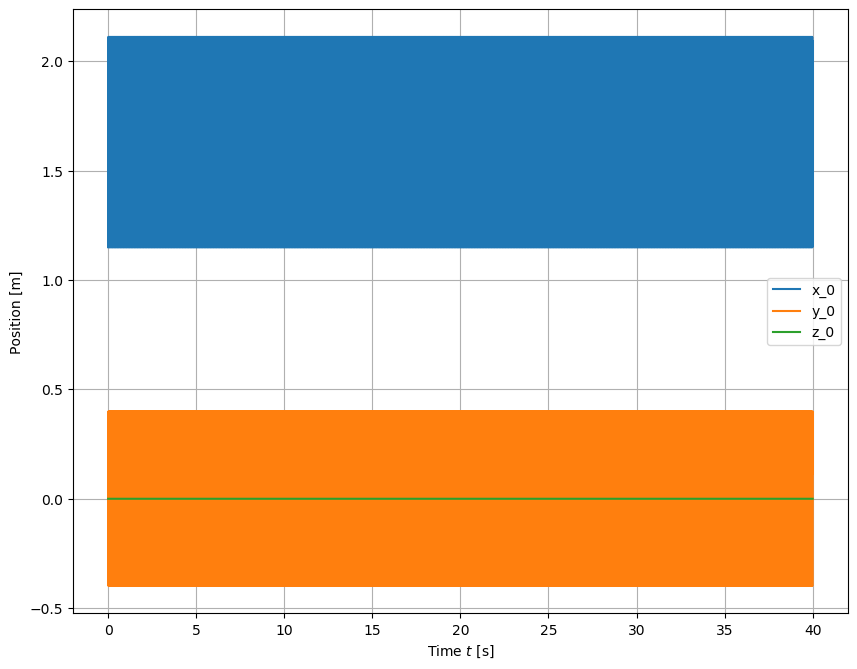

implicit_boris2


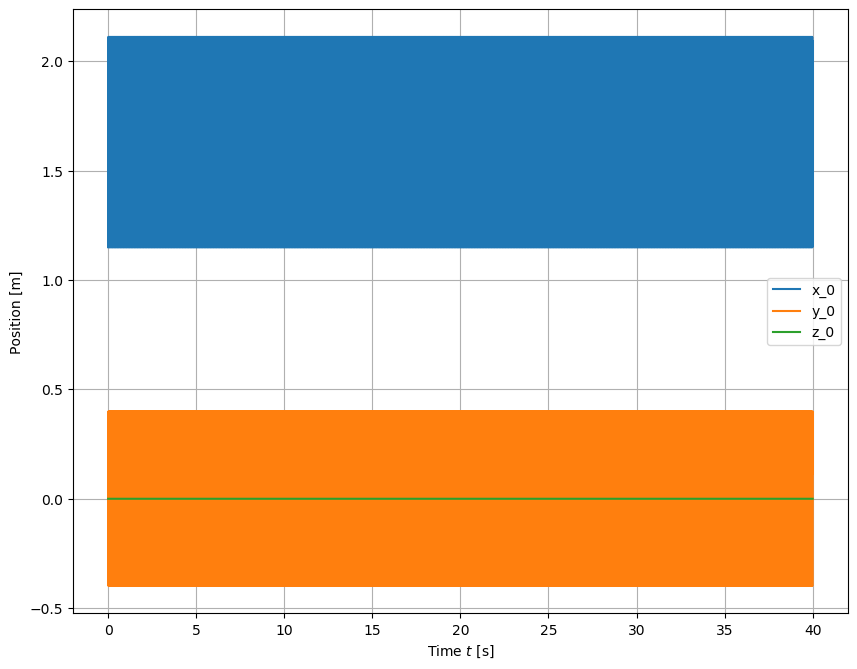

zenitani


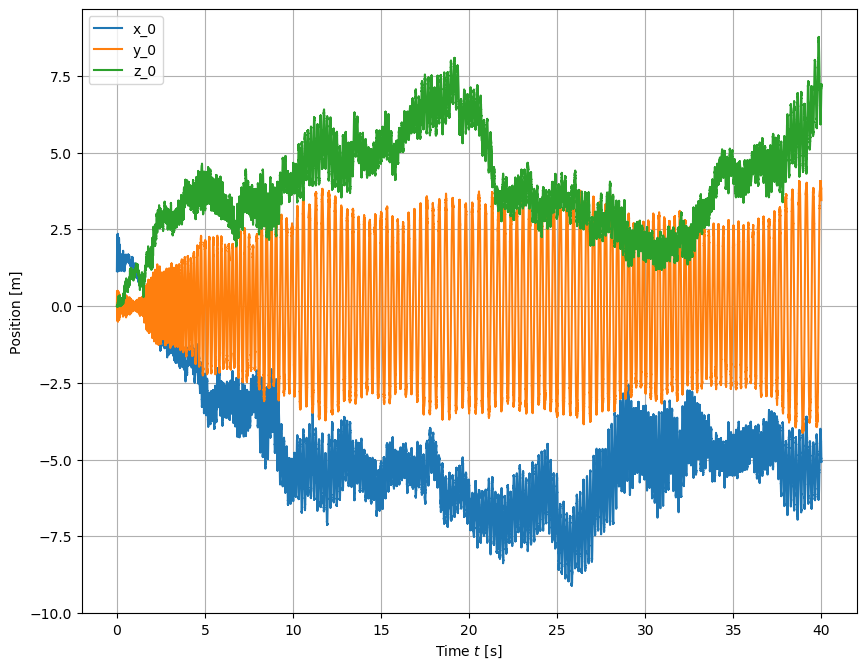

In [10]:
for solution in solutions:
    print(solution)
    solutions[solution].particletracker.plot_time_trajectories()

explicit_boris


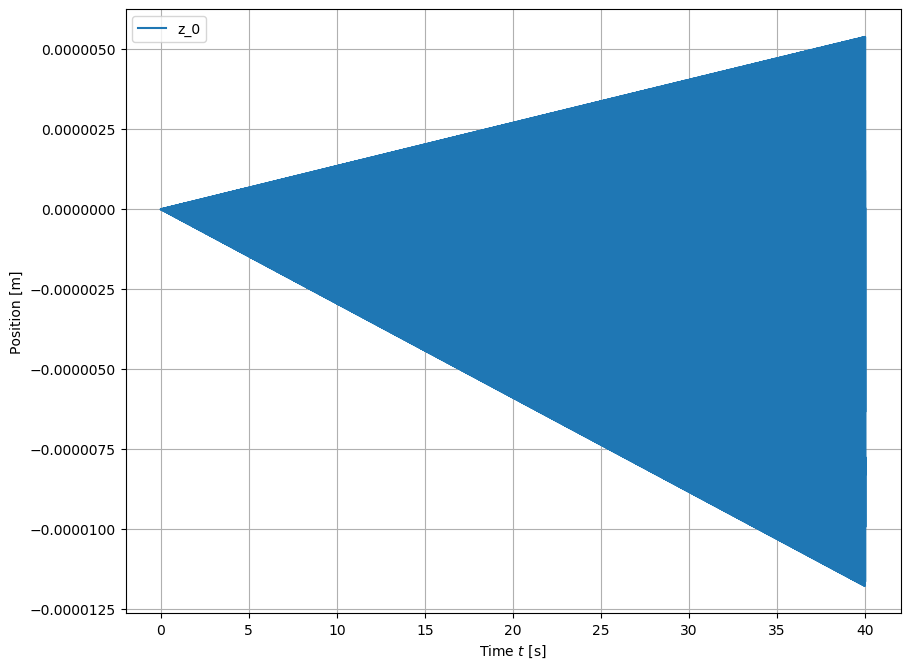

implicit_boris


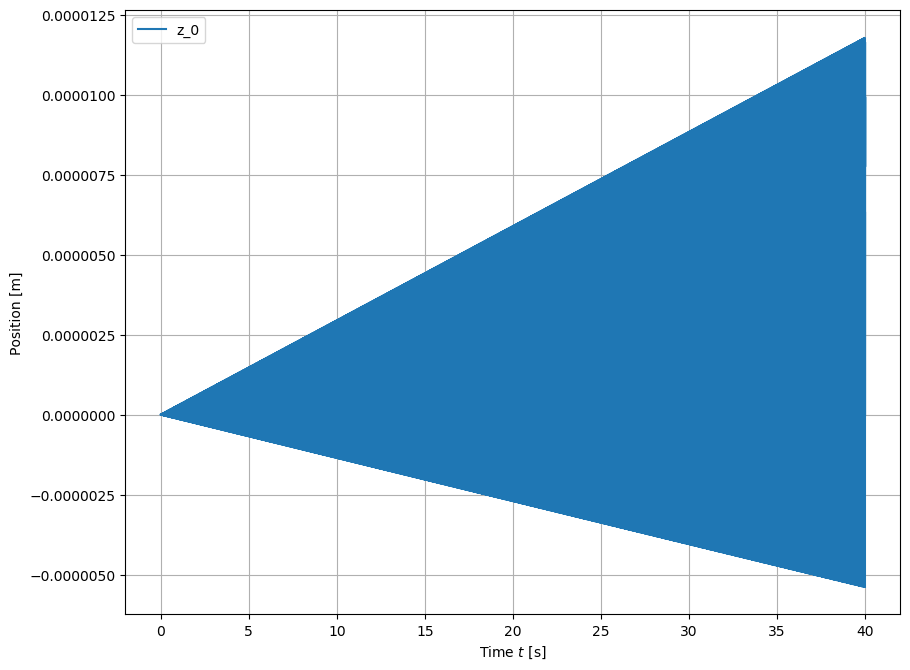

implicit_boris2


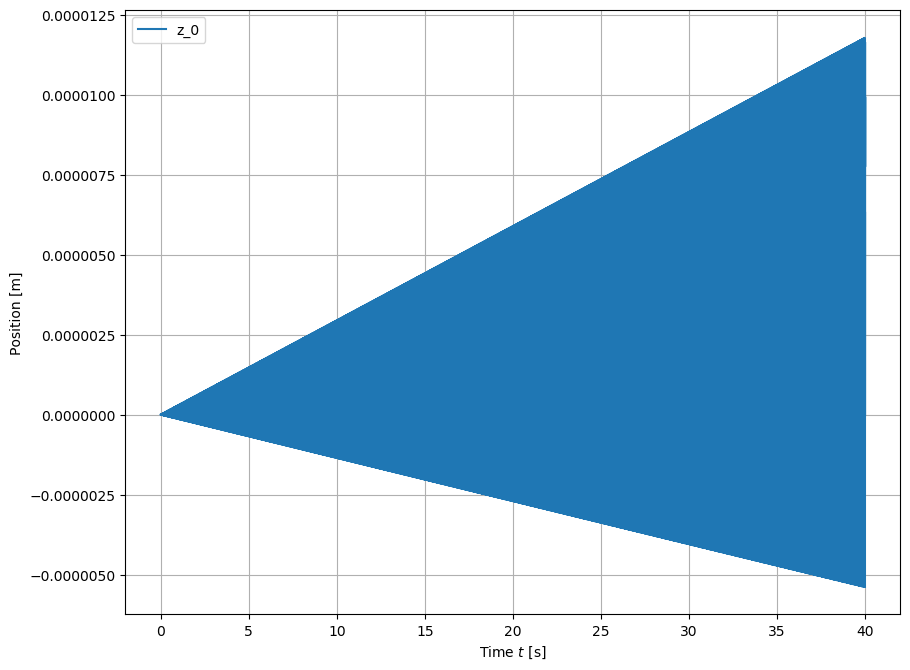

zenitani


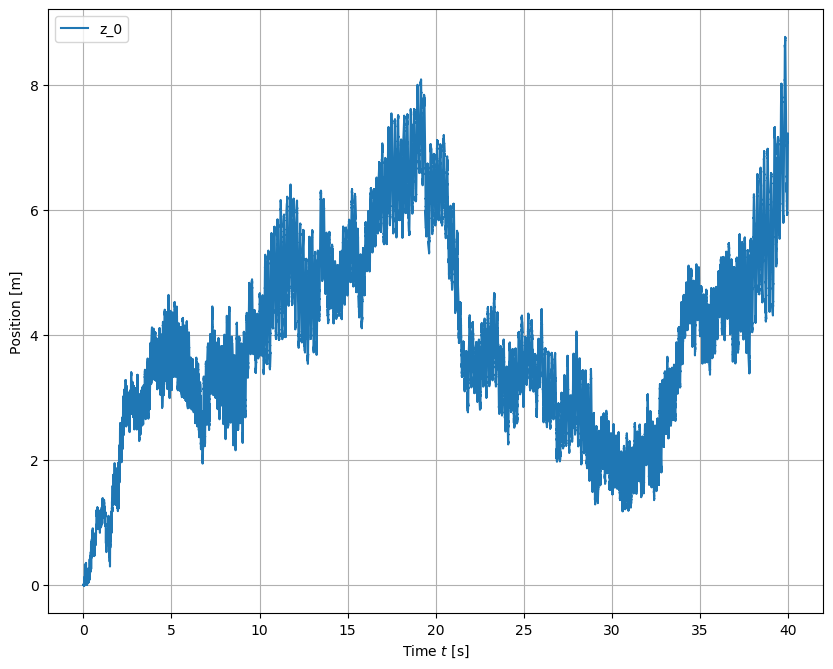

In [12]:
for solution in solutions:
    print(solution)
    solutions[solution].particletracker.plot_time_trajectories('z')

explicit_boris
<xarray.DataArray 'velocity' ()>
array(-1.43492963e-41)
Coordinates:
    particle  int64 0
implicit_boris2
<xarray.DataArray 'velocity' ()>
array(-7.44211902e-38)
Coordinates:
    particle  int64 0


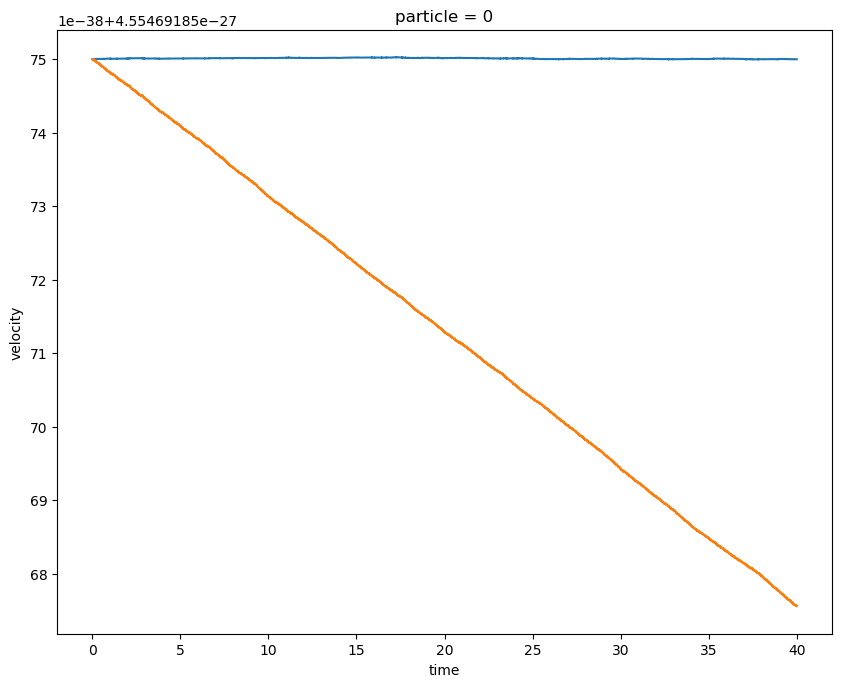

In [12]:
for solution in solutions:
    print(solution)
    solutions[solution].kinetic_energy.sel(particle=0).plot.line(x='time')
    print(solutions[solution].kinetic_energy.sel(particle=0).isel(time=-1) - solutions[solution].kinetic_energy.sel(particle=0).isel(time=0)) 

explicit_boris


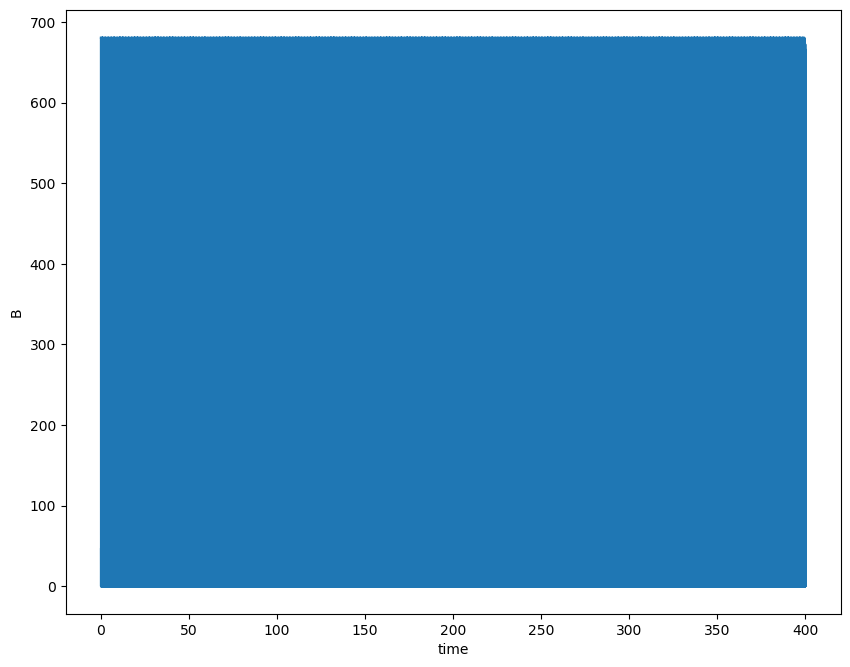

<xarray.DataArray 'velocity' ()>
array(2.65461981e-40)
Coordinates:
    particle  int64 0


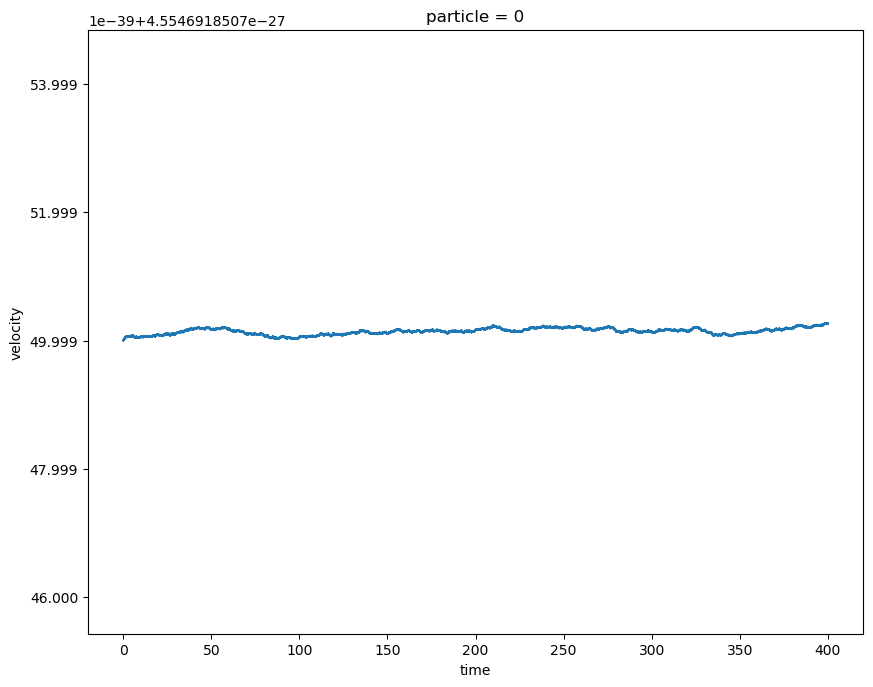

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1000x800 with 1 Axes>

implicit_boris2


In [ ]:
solutions2 = {}
for push in ['explicit_boris', 'implicit_boris2']:
    solution = sim_single.run(400 * u.s, 1e-3 * u.s, pusher=push)
    solutions2[push] = solution
for name, solution in solutions2.items():
    print(name)
    (solution.data.B**2).sum(dim=['particle','dimension']).plot.line()
    plt.show()
    solution.kinetic_energy.sel(particle=0).plot.line(x='time')
    print(solution.kinetic_energy.sel(particle=0).isel(time=-1) - solution.kinetic_energy.sel(particle=0).isel(time=0)) 
    plt.show()
    solution.plot_trajectories()
    plt.show()

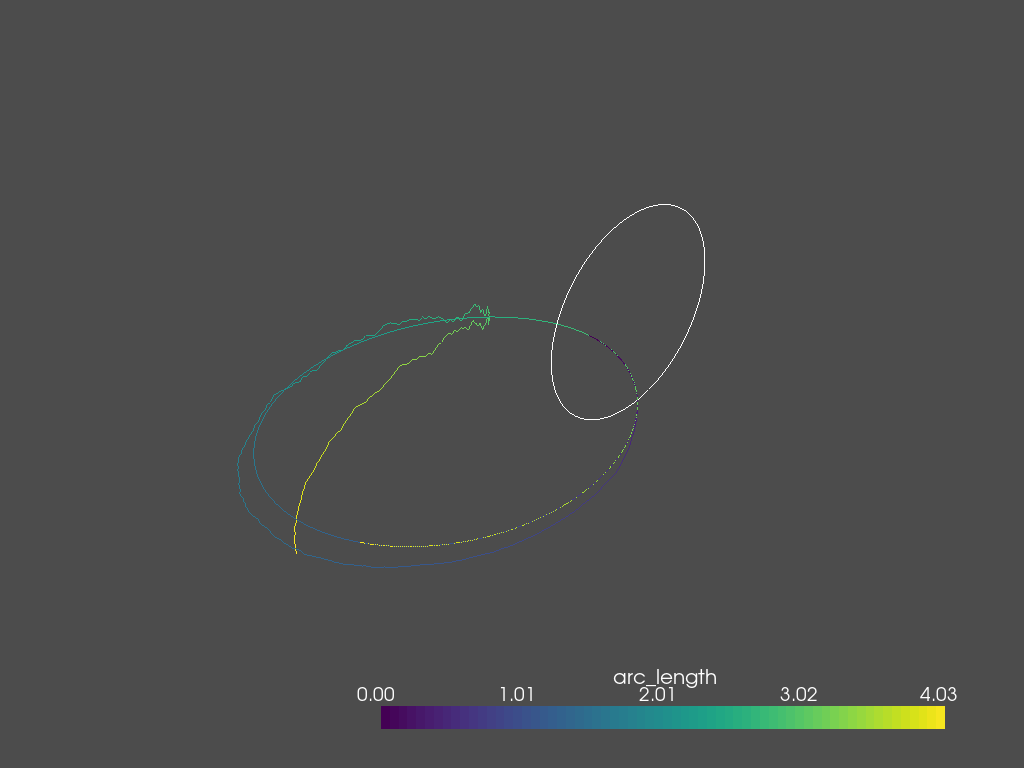

In [34]:
fig = pyvista.Plotter()
for solution in solutions.values():
    solution.visualize(fig)
fig.show()

In [35]:
for push in ['zenitani']:
    print(push)
    solution = sim_single.run(0.04 * u.s, 1e-4 * u.s, pusher=push)
    fig = pyvista.Plotter()
    solution.visualize(fig)
    fig.show()
    (solution.data.B**2).sum(dim=['particle','dimension']).plot.line()
    plt.show()

zenitani


KeyboardInterrupt: 

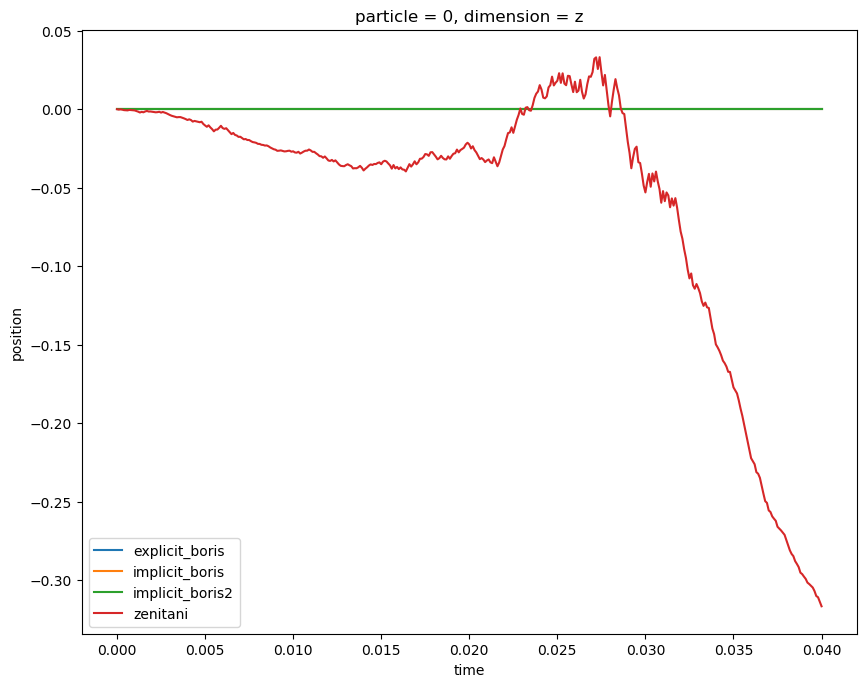

In [36]:
for solution in solutions:
    solutions[solution].data.position.sel(dimension='z', particle=0).plot(x='time', label=solution)
plt.legend()

(0, 0.05)

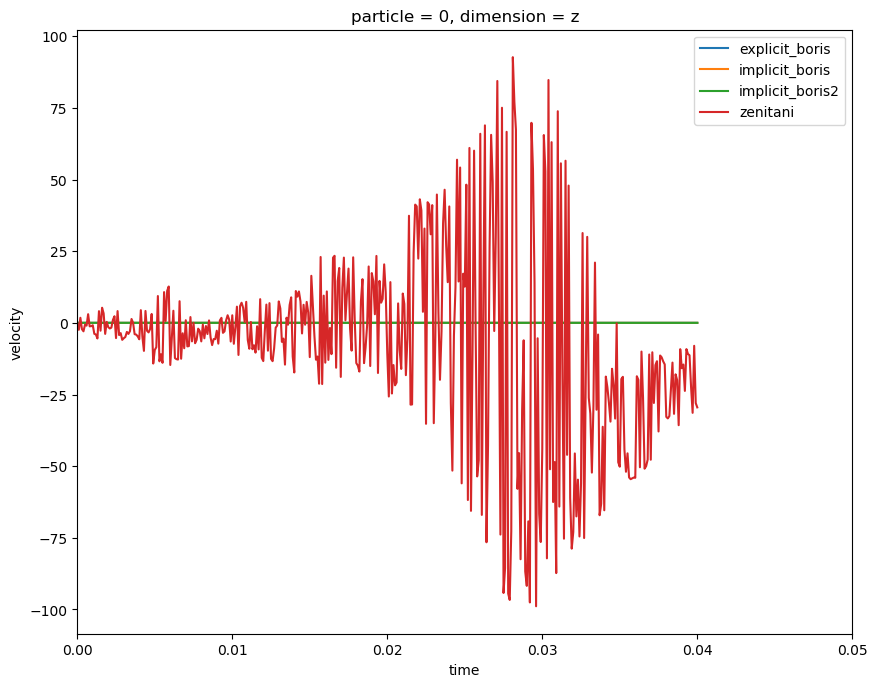

In [40]:
for solution in solutions:
    solutions[solution].data.velocity.sel(dimension='z', particle=0).plot(x='time', label=solution)
plt.legend()
plt.xlim(0, 0.05)

zenitani


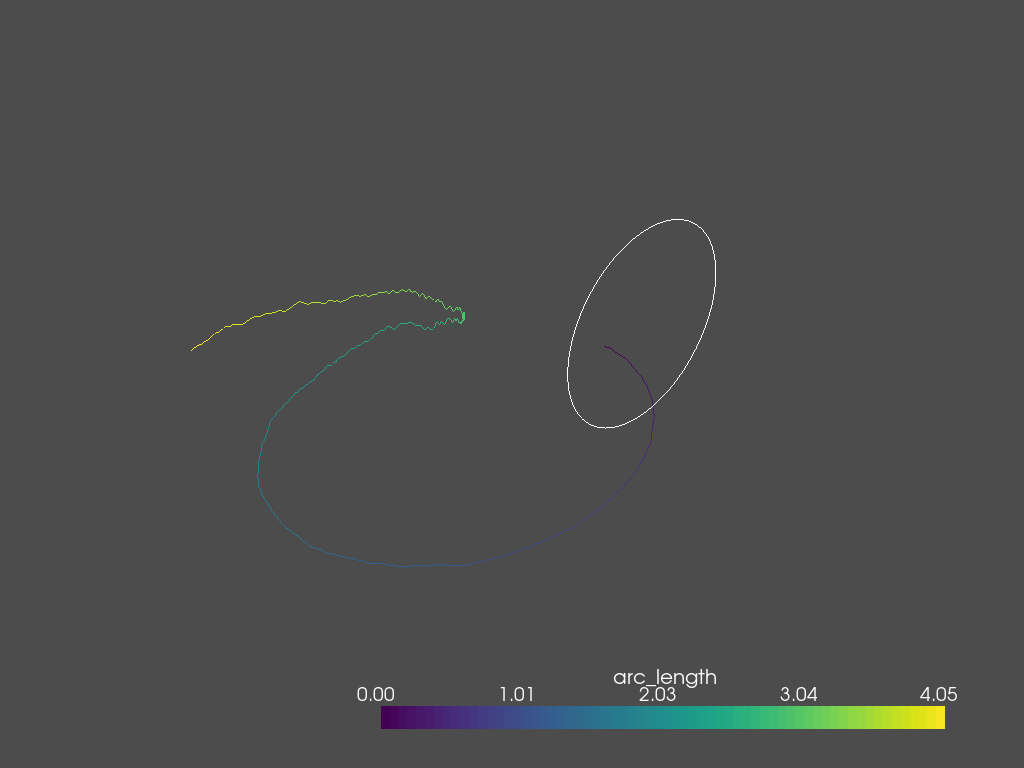

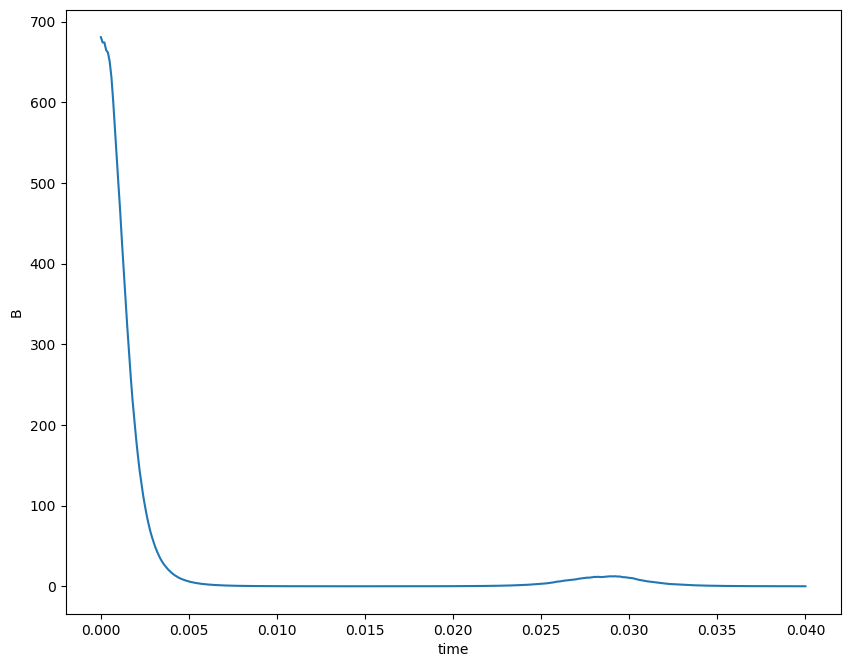

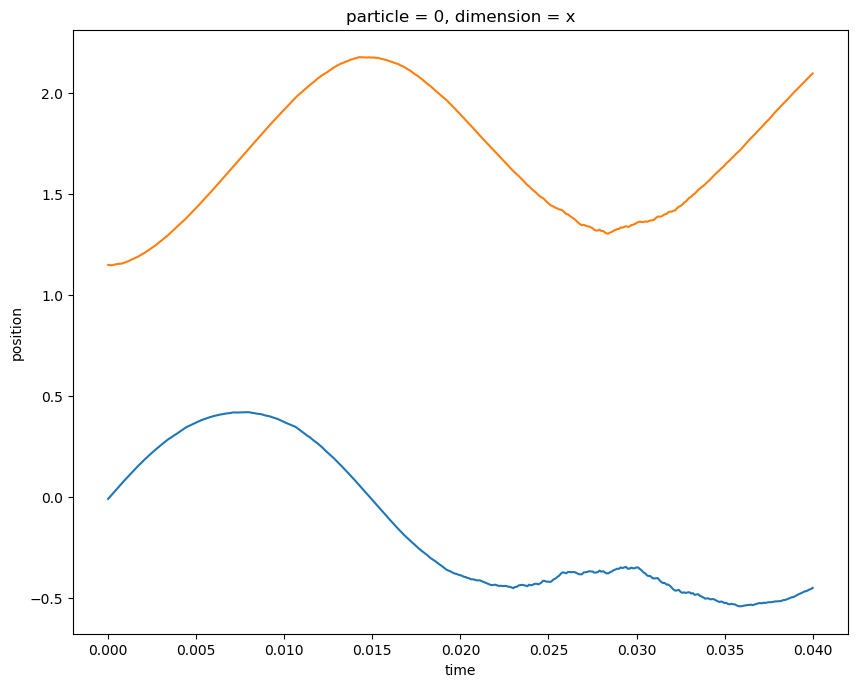

In [12]:
for push in ['zenitani']:
    print(push)
    solution = sim_single.run(0.04 * u.s, 1e-4 * u.s, pusher=push)
    fig = pyvista.Plotter()
    solution.visualize(fig)
    fig.show()
    (solution.data.B**2).sum(dim=['particle','dimension']).plot.line()
    plt.show()
    (solution.data.position).sel(particle=0, dimension='y').plot.line()
    (solution.data.position).sel(particle=0, dimension='x').plot.line()
    plt.show()